# Explore here

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
url = 'https://breathecode.herokuapp.com/asset/internal-link?id=929&path=medical_insurance_cost.csv'
df = pd.read_csv(url, encoding= 'utf-8', quotechar= '"')#.to_csv('../data/raw/medical_insurance_cost.csv', index=False, encoding= 'utf-8')

In [40]:
#df = pd.read_csv('../data/raw/medical_insurance_cost.csv')
df = df[df['charges'] < 50000]

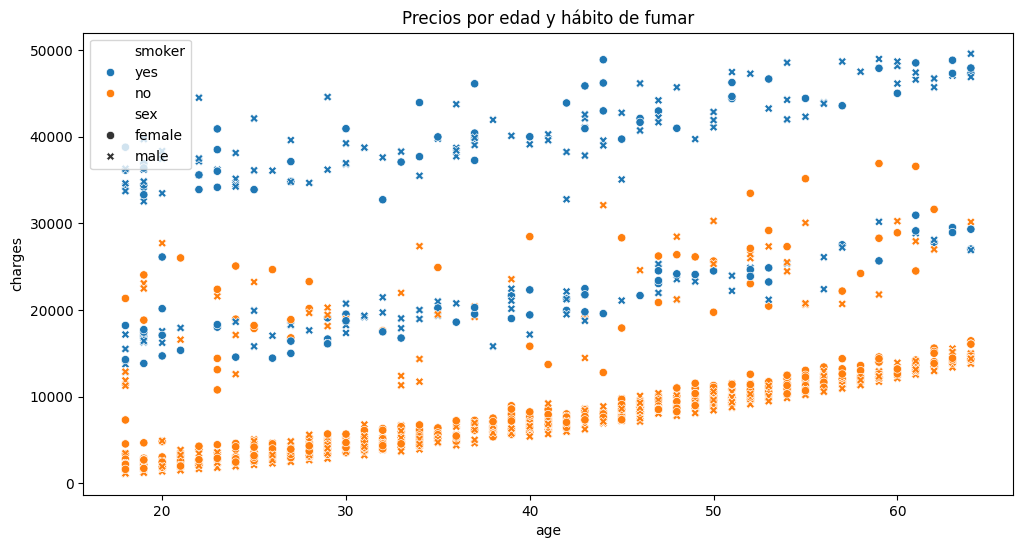

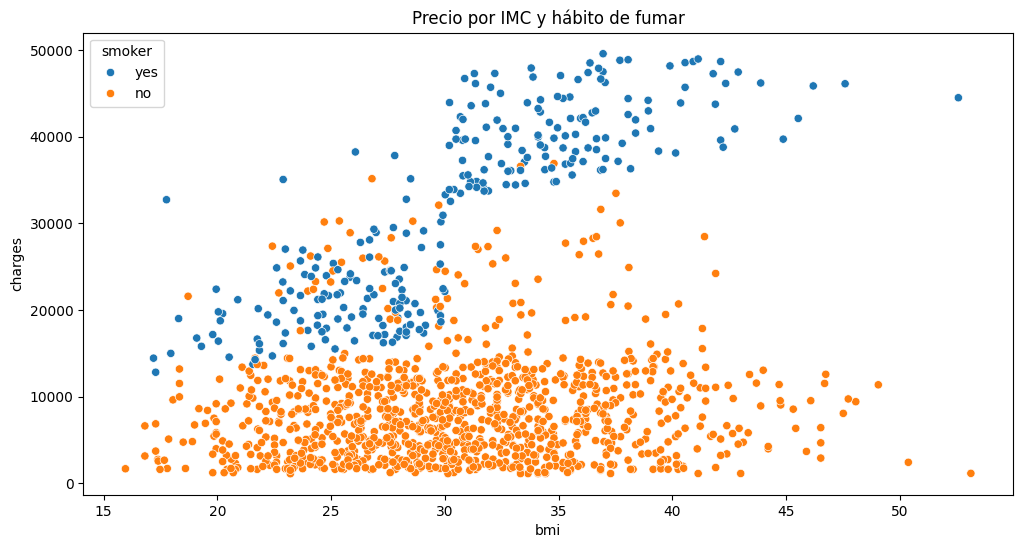

In [41]:
plt.figure(figsize=(12, 6))
sns.scatterplot(df, x='age', y='charges', hue='smoker', style='sex')
plt.title('Precios por edad y hábito de fumar')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(df, x='bmi', y='charges', hue='smoker')
plt.title('Precio por IMC y hábito de fumar')
plt.show()

In [42]:
X = df.drop('charges', axis=1)
y = df['charges']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [44]:
for col in ['sex', 'smoker', 'region']:
    mapping = {cat: i for i, cat in enumerate(X_train[col].unique())}
    X_train[col] = X_train[col].map(mapping)
    X_test[col] = X_test[col].map(mapping)

In [45]:
np.sort(df['age'].unique())

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

In [46]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
y_pred = model.predict(X_test_scaled)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MSE: 35638903.28863904
R²: 0.7755257296736273



Errores más altos:
          y_test        y_pred         error
219  25081.76784   1712.228636 -23369.539204
936  32108.66282   9874.180289 -22234.482531
102  21344.84670   2126.780670 -19218.066030
806  28476.73499  11616.169688 -16860.565302
355  24603.04837   8699.257287 -15903.791083


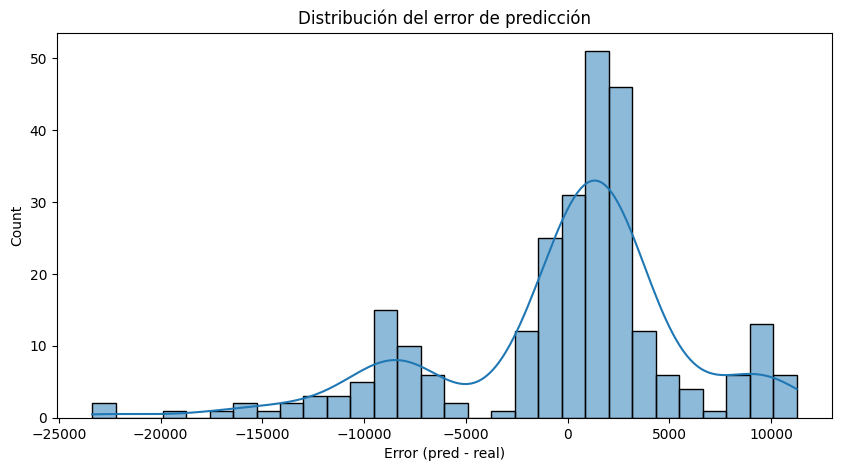

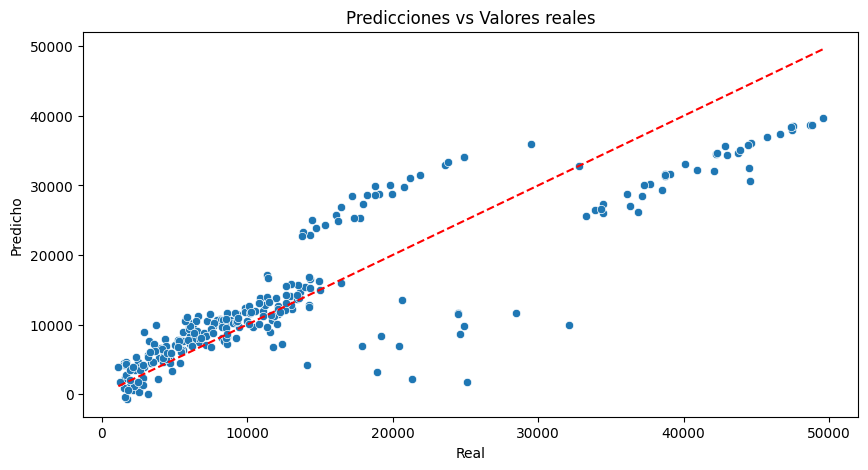

In [48]:
errors = pd.DataFrame({
    'y_test': y_test,
    'y_pred': y_pred,
    'error': y_pred - y_test
})
print("\nErrores más altos:")
print(errors.sort_values('error', key=abs, ascending=False).head())

plt.figure(figsize=(10,5))
sns.histplot(errors['error'], bins=30, kde=True)
plt.title("Distribución del error de predicción")
plt.xlabel("Error (pred - real)")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Predicciones vs Valores reales")
plt.xlabel("Real")
plt.ylabel("Predicho")
plt.show()

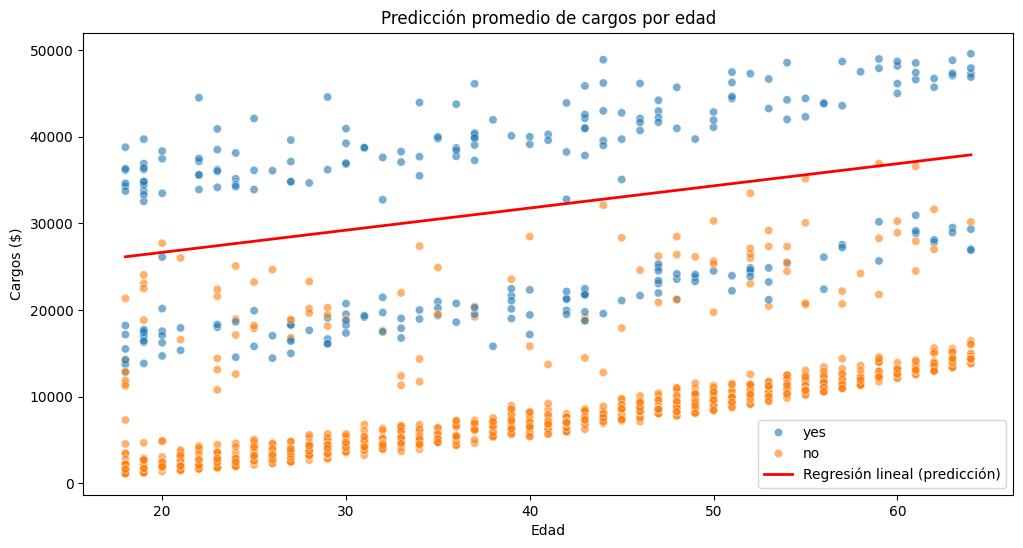

In [49]:
age_range = np.linspace(df['age'].min(), df['age'].max(), 100)
avg_bmi = X_train['bmi'].mean()
avg_children = X_train['children'].mean()
avg_sex = X_train['sex'].map({v: k for k, v in mapping.items()}).unique()[0]
avg_smoker = 0  # no fumador
avg_region = 0

tmp = pd.DataFrame({
    'age': age_range,
    'bmi': avg_bmi,
    'children': avg_children,
    'sex': 0,
    'smoker': avg_smoker,
    'region': avg_region
})
tmp_scaled = pd.DataFrame(scaler.transform(tmp[num_cols]), columns=num_cols)
y_pred_age = model.predict(tmp_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(df, x='age', y='charges', hue='smoker', alpha=0.6)
plt.plot(age_range, y_pred_age, color='red', linewidth=2, label='Regresión lineal (predicción)')
plt.title('Predicción promedio de cargos por edad')
plt.xlabel('Edad')
plt.ylabel('Cargos ($)')
plt.legend()
plt.show()

In [50]:
#linear regression model

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
y_pred = model.predict(X_test)

In [52]:
y_test

950     11534.87265
1131     3693.42800
1239     3238.43570
298     38746.35510
657      4058.71245
           ...     
533     19214.70553
1200     6198.75180
759     36307.79830
1298     5261.46945
1284    47403.88000
Name: charges, Length: 267, dtype: float64

In [53]:
#compare y_pred

y_test = y_test.reset_index(drop=True)

pred = pd.DataFrame({'y_pred':y_pred})
pred['y_test'] = y_test
pred['error'] = pred['y_pred'] - pred['y_test']
pred

,y_pred,y_test,error
0,8941.326564,11534.87265,-2593.546086
1,9916.149417,3693.42800,6222.721417
2,7580.119297,3238.43570,4341.683597
3,31615.380958,38746.35510,-7130.974142
4,6686.831253,4058.71245,2628.118803
...,...,...,...
262,8403.134254,19214.70553,-10811.571276
263,6915.704634,6198.75180,716.952834
264,27020.353557,36307.79830,-9287.444743
265,6719.012310,5261.46945,1457.542860


In [54]:
mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)

(35638903.288639024, 0.7755257296736274)

In [55]:
X_descaled = df.loc[X_test.index].drop(['sex', 'smoker', 'region','charges'], axis=1)
X_descaled.head()

,age,bmi,children
950,57,18.335,0
1131,27,45.900,2
1239,25,42.130,1
298,31,34.390,3
657,27,33.155,2


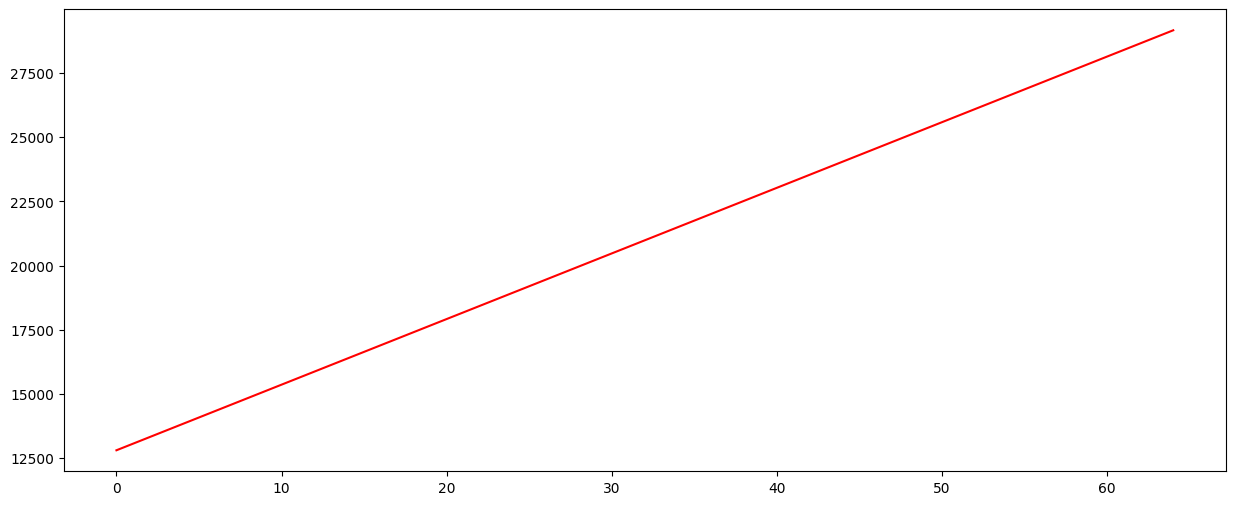

In [56]:
X_array = X_descaled.values.ravel()
regression = m * X_array + b

sorted_idx = X_array.argsort()

plt.figure(figsize=(15, 6))
plt.plot(X_array[sorted_idx], regression[sorted_idx], color='red')
plt.show()

In [57]:
print(m)
print(b)

255.7039176698036
12800.542934500332
